### Celula 1
**Ce face:** Pornește cronometrul pentru durata totală a notebook‑ului.


In [1]:
# --- start timer ---
import time
PROCESS_START = time.time()


### Celula 2
**Ce face:** Celulă de cod auxiliară.


In [2]:
import pandas as pd
import numpy as np
# from nltk.stem import WordNetLemmatizer
# import nltk
# nltk.download("wordnet")
# nltk.download("omw-1.4")
# LEMMATIZER = WordNetLemmatizer()

### Celula 3
**Ce face:** Încarcă datele din fișiere CSV.


In [3]:
import pandas as pd

train_df = pd.read_csv("../data/raw/imdb_train.csv")
test_df = pd.read_csv("../data/raw/imdb_test.csv")

print("Train size:", len(train_df))
print("Test size:", len(test_df))
print("Total examples:", len(train_df) + len(test_df))

Train size: 25000
Test size: 25000
Total examples: 50000


### Celula 4
**Ce face:** Încarcă datele din fișiere CSV. train_df - 80% din date val_df - 20% din date


In [4]:
from sklearn.model_selection import train_test_split

train_df = pd.read_csv("../data/raw/imdb_train.csv")

train_df, val_df = train_test_split(
    train_df,
    test_size=0.2,
    random_state=42,
    stratify=train_df["label"]
)

train_df.to_csv("../data/processed/train_clean.csv", index=False)
val_df.to_csv("../data/processed/val_clean.csv", index=False)

### Celula 5
**Ce face:** Încarcă datele din fișiere CSV.


In [5]:
import pandas as pd

train_df = pd.read_csv("../data/processed/train_clean.csv")
val_df = pd.read_csv("../data/processed/val_clean.csv")
test_df = pd.read_csv("../data/raw/imdb_test.csv")

print(f"Train: {len(train_df)}")
print(f"Validation: {len(val_df)}")
print(f"Test: {len(test_df)}")
print(f"Total: {len(train_df) + len(val_df) + len(test_df)}")


print("\nTrain:")
print(train_df["label"].value_counts(normalize=True))

print("\nValidation:")
print(val_df["label"].value_counts(normalize=True))

print("\nTest:")
print(test_df["label"].value_counts(normalize=True))

Train: 20000
Validation: 5000
Test: 25000
Total: 50000

Train:
label
1    0.5
0    0.5
Name: proportion, dtype: float64

Validation:
label
1    0.5
0    0.5
Name: proportion, dtype: float64

Test:
label
0    0.5
1    0.5
Name: proportion, dtype: float64


### Celula 6
**Ce face:** Punct 3. curățare text, lowercasing, eliminare simboluri inutile, tokenizare, eliminare stopwords,  filtrare după lungime (optional) - 6


In [ ]:
import pandas as pd
import re
import numpy as np

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

STOPWORDS = set(ENGLISH_STOP_WORDS)
# the, is, are, was, were, and, or, to, of, in, on, for, with, that, this, it, as, at, by, from, an, be, but, not, no, so, if, than, then, too, very, just, about, into, over, after, before, between, during, while

def clean_text(text: str) -> str:
    if pd.isna(text):
        return ""

    text = str(text)

    # curățare HTML + link-uri
    text = re.sub(r"<.*?>", " ", text)
    text = re.sub(r"http\S+|www\.\S+", " ", text)

    # lowercase
    text = text.lower()

    # păstrăm doar litere + spații
    text = re.sub(r"[^a-z\s]", " ", text)

    # tokenizare simplă
    tokens = text.split()

    # stopwords + tokenuri scurte
    tokens = [t for t in tokens if t not in STOPWORDS and len(t) > 2]

    # lematizare
    # tokens = [LEMMATIZER.lemmatize(t) for t in tokens]

    return " ".join(tokens)

### Celula 7
**Ce face:** Încarcă datele din fișiere CSV.


In [ ]:
train_df = pd.read_csv("../data/raw/imdb_train.csv")
test_df  = pd.read_csv("../data/raw/imdb_test.csv")

print("Train columns:", train_df.columns.tolist())
print("Test columns :", test_df.columns.tolist())

TEXT_COL = "text" if "text" in train_df.columns else "review"

label2sent = {0: "negative", 1: "positive"}
if "sentiment" not in train_df.columns:
    train_df["sentiment"] = train_df["label"].map(label2sent)
if "sentiment" not in test_df.columns:
    test_df["sentiment"] = test_df["label"].map(label2sent)

train_df["text_clean"] = train_df[TEXT_COL].apply(clean_text)
test_df["text_clean"]  = test_df[TEXT_COL].apply(clean_text)

train_clean = train_df[["text_clean", "sentiment"]].rename(columns={"text_clean": "text"})
test_clean  = test_df[["text_clean", "sentiment"]].rename(columns={"text_clean": "text"})

train_clean.to_csv("../data/processed/train_clean.csv", index=False)
test_clean.to_csv("../data/processed/test_clean.csv", index=False)

train_clean.head()

Train columns: ['text', 'label']
Test columns : ['text', 'label']


,text,sentiment
0,rented curious yellow video store controversy ...,negative
1,curious yellow risible pretentious steaming pi...,negative
2,avoid making type film future film interesting...,negative
3,film probably inspired godard masculin minin u...,negative
4,brother hearing ridiculous film umpteen years ...,negative


### Celula 8
**Ce face:** verifică corectitudinea preprocesării și a distribuției datelor.


In [8]:
print("Exemplu înainte:\n", train_df.loc[0, TEXT_COL][:250], "\n")
print("Exemplu după:\n", train_clean.loc[0, "text"][:250], "\n")

print("Train size:", len(train_clean))
print("Test size :", len(test_clean))

print("\nDistribuție train:")
print(train_clean["sentiment"].value_counts(normalize=True))

print("\nDistribuție test:")
print(test_clean["sentiment"].value_counts(normalize=True))

Exemplu înainte:
 I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a  

Exemplu după:
 rented curious yellow video store controversy surrounded released heard seized customs tried enter country fan films considered controversial really plot centered young swedish drama student named lena wants learn life particular wants focus attentio 

Train size: 25000
Test size : 25000

Distribuție train:
sentiment
negative    0.5
positive    0.5
Name: proportion, dtype: float64

Distribuție test:
sentiment
negative    0.5
positive    0.5
Name: proportion, dtype: float64


### Celula 9
**Ce face:** Încarcă datele din fișiere CSV.


# SVM – Evaluare completă (Macro‑F1 + PR‑AUC)
**Ce este:** completare evaluare pentru Modelul 1.
**Unde se folosește:** după rularea grid‑ului SVM.
**Bifează:** Macro‑F1 + PR‑AUC.


In [ ]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler

from scipy.sparse import hstack, csr_matrix

train_df = pd.read_csv("../data/processed/train_clean.csv")
test_df  = pd.read_csv("../data/processed/test_clean.csv")

X_train, y_train = train_df["text"].astype(str), train_df["sentiment"].astype(str)
X_test,  y_test  = test_df["text"].astype(str),  test_df["sentiment"].astype(str)

def extra_features(texts: pd.Series) -> np.ndarray:
    feats = []
    for t in texts.astype(str).tolist():
        tokens = t.split()
        char_len = len(t)
        token_len = len(tokens)
        avg_token_len = (sum(len(tok) for tok in tokens) / token_len) if token_len > 0 else 0.0
        unique_ratio = (len(set(tokens)) / token_len) if token_len > 0 else 0.0
        feats.append([char_len, token_len, avg_token_len, unique_ratio])
    return np.array(feats, dtype=np.float32)

tfidf = TfidfVectorizer(
    max_features=50000,
    ngram_range=(1,2),
    min_df=2,
    max_df=0.95,
    sublinear_tf=True
)

Xtr_tfidf = tfidf.fit_transform(X_train)
Xte_tfidf = tfidf.transform(X_test)

Xtr_extra = extra_features(X_train)
Xte_extra = extra_features(X_test)

scaler = StandardScaler()
Xtr_extra_scaled = scaler.fit_transform(Xtr_extra)
Xte_extra_scaled = scaler.transform(Xte_extra)

# nu este pipeline standard
X_train_all = hstack([Xtr_tfidf, csr_matrix(Xtr_extra_scaled)])
X_test_all  = hstack([Xte_tfidf, csr_matrix(Xte_extra_scaled)])

svm = LinearSVC(max_iter=10000)
svm.fit(X_train_all, y_train)

pred = svm.predict(X_test_all)

acc = accuracy_score(y_test, pred)
prec, rec, f1, _ = precision_recall_fscore_support(
    y_test, pred, average="binary", pos_label="positive"
)

print("accuracy, precision, recall, f1 =", (acc, prec, rec, f1))

accuracy, precision, recall, f1 = (0.87988, 0.8854614822631707, 0.87264, 0.8790039888794875)


### Celula 10
**Ce face:** Model ML clasic: TF‑IDF + SVM + features extra.


In [10]:
metrics_svm = pd.DataFrame([{
    "model": "TF-IDF (1-2gram) + LinearSVC + extra_feats",
    "accuracy": float(acc),
    "precision": float(prec),
    "recall": float(rec),
    "f1_score": float(f1),
}])
metrics_svm.to_csv("../results/metrics_svm.csv", index=False)
metrics_svm

,model,accuracy,precision,recall,f1_score
0,TF-IDF (1-2gram) + LinearSVC + extra_feats,0.87988,0.885461,0.87264,0.879004


### Celula 11
**Ce face:** Încarcă datele din fișiere CSV.


In [11]:
import pandas as pd

train_df = pd.read_csv("../data/processed/train_clean.csv")
test_df  = pd.read_csv("../data/processed/test_clean.csv")
val_df   = pd.read_csv("../data/processed/val_clean.csv")

print(train_df.columns)

Index(['text', 'sentiment'], dtype='str')


### Celula 12
**Ce face:** Facem rost de accelerate si transformers - necesare pentru antrenarea modelelor bazate pe transformere.


In [ ]:

import sys, subprocess

def _pip_install(*pkgs):
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-U", *pkgs])

try:
    import accelerate  # noqa: F401
except ImportError:
    _pip_install("accelerate>=1.1.0")

try:
    import transformers  # noqa: F401
except ImportError:
    _pip_install("transformers[torch]")

import accelerate, transformers
print("accelerate", accelerate.__version__)
print("transformers", transformers.__version__)


accelerate 1.12.0
transformers 5.0.0


### Celula 13
**Ce face:** Încarcă datele din fișiere CSV.


In [ ]:
import os
import numpy as np
import pandas as pd

import torch
from datasets import Dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    DataCollatorWithPadding
)

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# load processed data
train_df = pd.read_csv("../data/processed/train_clean.csv")
val_df   = pd.read_csv("../data/processed/val_clean.csv") if os.path.exists("../data/processed/val_clean.csv") else None
test_df  = pd.read_csv("../data/processed/test_clean.csv")

train_df.head(), test_df.head()


(                                                text sentiment
 0  rented curious yellow video store controversy ...  negative
 1  curious yellow risible pretentious steaming pi...  negative
 2  avoid making type film future film interesting...  negative
 3  film probably inspired godard masculin minin u...  negative
 4  brother hearing ridiculous film umpteen years ...  negative,
                                                 text sentiment
 0  love sci willing lot sci movies usually underf...  negative
 1  worth entertainment value rental especially li...  negative
 2  totally average film semi alright action seque...  negative
 3  star rating saturday night friday night friday...  negative
 4  let say haven enjoyed van damme movie bloodspo...  negative)

### Celula 14
**Ce face:** Tranformam inpoi in label 0 si 1. Transformers are nevoie de 0 si 1.


In [ ]:
LABEL2ID = {"negative": 0, "positive": 1}
ID2LABEL = {0: "negative", 1: "positive"}

def prep_df(df):
    df = df.copy()
    df["text"] = df["text"].astype(str)

    if "sentiment" in df.columns:
        mapped = df["sentiment"].map(LABEL2ID)
    elif "label" in df.columns:
        if df["label"].dtype == object:
            mapped = df["label"].map(LABEL2ID)
        else:
            mapped = df["label"]
    else:
        raise KeyError(f"Expected 'sentiment' or 'label' column, got: {list(df.columns)}")

    if mapped.isna().any():
        bad = df.loc[mapped.isna(), "sentiment" if "sentiment" in df.columns else "label"].unique().tolist()
        raise ValueError(f"Unknown label values: {bad}")

    df["label"] = mapped.astype(int)
    return df[["text", "label"]]

train_df = prep_df(train_df)
val_df   = prep_df(val_df)
test_df  = prep_df(test_df)

print(len(train_df), len(val_df), len(test_df))


25000 5000 25000


### Celula 15
**Ce face:** Initializează tokenizerul pentru modelul neural.


In [15]:
model_name = "distilbert-base-uncased"
# vacabulary
tokenizer = AutoTokenizer.from_pretrained(model_name)

train_ds = Dataset.from_pandas(train_df)
val_ds   = Dataset.from_pandas(val_df)
test_ds  = Dataset.from_pandas(test_df)
#  input_ids, attention_mask,
def tokenize_fn(batch):
    return tokenizer(batch["text"], truncation=True, max_length=96)

train_tok = train_ds.map(tokenize_fn, batched=True)
val_tok   = val_ds.map(tokenize_fn, batched=True)
test_tok  = test_ds.map(tokenize_fn, batched=True)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

### Celula 16
**Ce face:** Încarcă modelul DistilBERT pentru clasificare.


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2,
    id2label=ID2LABEL,
    label2id=LABEL2ID
)

counts = train_df["label"].value_counts().sort_index().values  # [count_neg, count_pos]
total = counts.sum()
class_weights = torch.tensor([total / counts[0], total / counts[1]], dtype=torch.float32)

class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        # scoruir brute
        logits = outputs.logits

        # mutăm weights pe device-ul modelului
        w = class_weights.to(logits.device)
        loss_fn = torch.nn.CrossEntropyLoss(weight=w)
        loss = loss_fn(logits, labels)

        return (loss, outputs) if return_outputs else loss

# gradient checkpointing pentru reducerea consumului de memorie
model.gradient_checkpointing_enable()


Loading weights:   0%|          | 0/100 [00:00<?, ?it/s]

DistilBertForSequenceClassification LOAD REPORT from: distilbert-base-uncased
Key                     | Status     | 
------------------------+------------+-
vocab_transform.weight  | UNEXPECTED | 
vocab_projector.bias    | UNEXPECTED | 
vocab_layer_norm.weight | UNEXPECTED | 
vocab_layer_norm.bias   | UNEXPECTED | 
vocab_transform.bias    | UNEXPECTED | 
classifier.weight       | MISSING    | 
pre_classifier.bias     | MISSING    | 
pre_classifier.weight   | MISSING    | 
classifier.bias         | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


### Celula 17
**Ce face:** Funcția compute_metrics calculează metrici standard de evaluare (Accuracy, Precision, Recall și F1-score) pe baza predicțiilor modelului și a etichetelor reale.funcția care spune Trainer-ului cum să evalueze modelul


In [17]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)

    acc = accuracy_score(labels, preds)
    prec, rec, f1, _ = precision_recall_fscore_support(labels, preds, average="binary", pos_label=1)
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1_score": f1}

### Celula 18
**Ce face:** Configurează complet procesul de antrenare al modelului DistilBERT: pe ce hardware rulează, cum învață, cât de des se evaluează, ce metrici se folosesc și cum sunt gestionate resursele.

In [18]:
device = "mps" if torch.backends.mps.is_available() else ("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# configurare antrenare
training_args = TrainingArguments(
    output_dir="../results/distilbert_out",
    eval_strategy="epoch",
    save_strategy="no",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=1,          
    weight_decay=0.01,
    logging_steps=50,
    report_to="none",
    fp16=True if device == "cuda" else False
)

Device: mps


### Celula 19
**Ce face:** Curăță memoria GPU-ului Apple (MPS) înainte să înceapă antrenarea, ca să eviți erori de tip out of memory.


In [19]:
# Reduce MPS memory pressure before trainer init
import gc, torch
if torch.backends.mps.is_available():
    gc.collect()
    torch.mps.empty_cache()


### Celula 20
**Ce face:** Inițializează trainerul pentru antrenare/evaluare.


In [20]:
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_tok,
    eval_dataset=val_tok,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

train_output = trainer.train()
train_output

/Users/raressimon/Desktop/ProiectFinalNLP/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  super().__init__(loader)


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1 Score
1,0.341936,0.400227,0.813200,0.760133,0.915200,0.830490


TrainOutput(global_step=3125, training_loss=0.37933900588989256, metrics={'train_runtime': 477.757, 'train_samples_per_second': 52.328, 'train_steps_per_second': 6.541, 'total_flos': 620715322661664.0, 'train_loss': 0.37933900588989256, 'epoch': 1.0})

### Celula 21
**Ce face:** Evaluează modelul / produce predicții.


In [21]:
test_metrics = trainer.evaluate(test_tok)
test_metrics

/Users/raressimon/Desktop/ProiectFinalNLP/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  super().__init__(loader)


{'eval_loss': 0.3248957693576813,
 'eval_accuracy': 0.86932,
 'eval_precision': 0.8712505026135907,
 'eval_recall': 0.86672,
 'eval_f1_score': 0.868979346300381,
 'eval_runtime': 89.3345,
 'eval_samples_per_second': 279.847,
 'eval_steps_per_second': 34.981,
 'epoch': 1.0}

### Celula 22
**Ce face:** Celulă de cod auxiliară.


In [22]:
import pandas as pd

metrics_bert = pd.DataFrame([{
    "model": "DistilBERT (weighted loss)",
    "accuracy": float(test_metrics["eval_accuracy"]),
    "precision": float(test_metrics["eval_precision"]),
    "recall": float(test_metrics["eval_recall"]),
    "f1_score": float(test_metrics["eval_f1_score"]),
    "train_size": int(len(train_df)),
    "test_size": int(len(test_df)),
    "epochs": float(training_args.num_train_epochs)
}])

metrics_bert.to_csv("../results/metrics_distilbert_subset.csv", index=False)
metrics_bert

,model,accuracy,precision,recall,f1_score,train_size,test_size,epochs
0,DistilBERT (weighted loss),0.86932,0.871251,0.86672,0.868979,25000,25000,1.0


### Celula 23
**Ce face:** Încarcă datele din fișiere CSV. Este o celulă de verificare a datasetului: verifică câte exemple ai, ce coloane de etichete există și dacă distribuția claselor este echilibrată în train / validation / test.


In [ ]:
import pandas as pd

train_df = pd.read_csv("../data/processed/train_clean.csv")
test_df  = pd.read_csv("../data/processed/test_clean.csv")

try:
    val_df = pd.read_csv("../data/processed/val_clean.csv")
    has_val = True
except:
    val_df = None
    has_val = False

def _label_col(df):
    if "sentiment" in df.columns:
        return "sentiment"
    if "label" in df.columns:
        return "label"
    raise KeyError(f"No label column in df. Columns: {list(df.columns)}")

print("Train:", len(train_df))
print("Val:", len(val_df) if has_val else "NU există val_clean.csv")
print("Test:", len(test_df))

print("\nDistribuție TRAIN:")
train_col = _label_col(train_df)
print(train_df[train_col].value_counts(normalize=True))

if has_val:
    print("\nDistribuție VAL:")
    val_col = _label_col(val_df)
    print(val_df[val_col].value_counts(normalize=True))

print("\nDistribuție TEST:")
test_col = _label_col(test_df)
print(test_df[test_col].value_counts(normalize=True))


Train: 25000
Val: 5000
Test: 25000

Distribuție TRAIN:
sentiment
negative    0.5
positive    0.5
Name: proportion, dtype: float64

Distribuție VAL:
label
1    0.5
0    0.5
Name: proportion, dtype: float64

Distribuție TEST:
sentiment
negative    0.5
positive    0.5
Name: proportion, dtype: float64


### Celula 24
**Ce face:** hyperparameter tuning (fine-tuning)


Running: svm_cfg1_unigram_C1
Running: svm_cfg2_uni+bi_C2
Running: svm_cfg3_uni+bi_C0.5


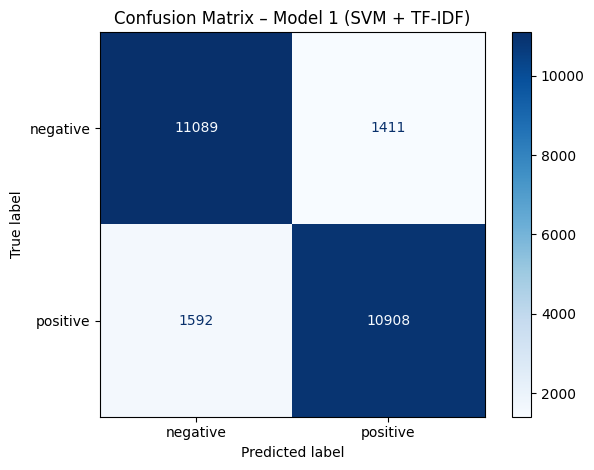

In [ ]:
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def extra_features(texts: pd.Series) -> np.ndarray:
    feats = []
    for t in texts.astype(str).tolist():
        tokens = t.split()
        char_len = len(t)
        token_len = len(tokens)
        avg_token_len = (sum(len(tok) for tok in tokens) / token_len) if token_len > 0 else 0.0
        unique_ratio = (len(set(tokens)) / token_len) if token_len > 0 else 0.0
        feats.append([char_len, token_len, avg_token_len, unique_ratio])
    return np.array(feats, dtype=np.float32)

def run_svm_config(cfg, X_train, y_train, X_test, y_test):
    tfidf = TfidfVectorizer(
        ngram_range=cfg["ngram_range"],
        max_features=cfg["max_features"],
        min_df=cfg["min_df"],
        max_df=cfg["max_df"],
        sublinear_tf=True
    )

    Xtr_tfidf = tfidf.fit_transform(X_train)
    Xte_tfidf = tfidf.transform(X_test)

    Xtr_extra = extra_features(X_train)
    Xte_extra = extra_features(X_test)

    from scipy.sparse import hstack, csr_matrix
    Xtr = hstack([Xtr_tfidf, csr_matrix(Xtr_extra)])
    Xte = hstack([Xte_tfidf, csr_matrix(Xte_extra)])

    # warning de convergență
    clf = LinearSVC(C=cfg["C"], max_iter=cfg.get("max_iter", 12000), tol=1e-4)
    clf.fit(Xtr, y_train)
    pred = clf.predict(Xte)

    acc = accuracy_score(y_test, pred)
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_test, pred, average="binary", pos_label="positive"
    )

    return {
        "model": "SVM+TFIDF+extra_feats",
        "config": cfg["name"],
        "accuracy": float(acc),
        "precision": float(prec),
        "recall": float(rec),
        "f1_score": float(f1),
        "C": cfg["C"],
        "ngram_range": str(cfg["ngram_range"]),
        "max_features": cfg["max_features"],
        "min_df": cfg["min_df"],
        "max_df": cfg["max_df"]
    }

train_df = pd.read_csv("../data/processed/train_clean.csv")
test_df  = pd.read_csv("../data/processed/test_clean.csv")

X_train = train_df["text"].astype(str)
y_train = train_df["sentiment"].astype(str)
X_test  = test_df["text"].astype(str)
y_test  = test_df["sentiment"].astype(str)

# warning de convergență
svm_configs = [
    {"name":"svm_cfg1_unigram_C1",   "C":1.0, "ngram_range":(1,1), "max_features":50000, "min_df":2, "max_df":0.95, "max_iter":12000},
    {"name":"svm_cfg2_uni+bi_C2",    "C":2.0, "ngram_range":(1,2), "max_features":80000, "min_df":2, "max_df":0.95, "max_iter":12000},
    {"name":"svm_cfg3_uni+bi_C0.5",  "C":0.5, "ngram_range":(1,2), "max_features":100000,"min_df":3, "max_df":0.90, "max_iter":12000},
]

svm_results = []
for cfg in svm_configs:
    print("Running:", cfg["name"])
    svm_results.append(run_svm_config(cfg, X_train, y_train, X_test, y_test))

svm_results_df = pd.DataFrame(svm_results).sort_values("f1_score", ascending=False)
svm_results_df.to_csv("../results/metrics_svm_grid.csv", index=False)
svm_results_df
# Confusion Matrix for best SVM config
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_svm = confusion_matrix(y_test, pred, labels=["negative", "positive"])

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_svm,
    display_labels=["negative", "positive"]
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Model 1 (SVM + TF-IDF)")
plt.tight_layout()
plt.savefig("../results/confusion_matrix_svm.png", dpi=150)
plt.show()

# --- extra metrics for SVM: Macro-F1 + PR-AUC ---
from sklearn.metrics import precision_recall_curve, auc, precision_recall_fscore_support

# Macro-F1 (pe best config)
macro_prec, macro_rec, macro_f1, _ = precision_recall_fscore_support(
    y_test, pred, average="macro"
)
print("SVM Macro-F1:", macro_f1)

# PR-AUC (folosim decision_function)
scores = clf.decision_function(Xte)
prec, rec, _ = precision_recall_curve(y_test, scores, pos_label="positive")
pr_auc = auc(rec, prec)
print("PR-AUC (SVM):", pr_auc)

plt.figure(figsize=(5,4))
plt.plot(rec, prec, label=f"PR-AUC={pr_auc:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve – SVM")
plt.legend()
plt.tight_layout()
plt.savefig("../results/pr_curve_svm.png", dpi=150)
plt.show()


### Celula 25
**Ce face:** Încarcă datele din fișiere CSV.


In [ ]:
import numpy as np
import pandas as pd
import torch

from datasets import Dataset
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, DataCollatorWithPadding,
    EarlyStoppingCallback
)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

train_df = pd.read_csv("../data/processed/train_clean.csv")
test_df  = pd.read_csv("../data/processed/test_clean.csv")

try:
    val_df = pd.read_csv("../data/processed/val_clean.csv")
except:
    val_df = train_df.sample(frac=0.1, random_state=42)
    train_df = train_df.drop(val_df.index).reset_index(drop=True)
    val_df = val_df.reset_index(drop=True)

LABEL2ID = {"negative": 0, "positive": 1}
ID2LABEL = {0: "negative", 1: "positive"}

def prep(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df["text"] = df["text"].astype(str)

    if "sentiment" in df.columns:
        mapped = df["sentiment"].map(LABEL2ID)
    elif "label" in df.columns:
        if df["label"].dtype == object:
            mapped = df["label"].map(LABEL2ID)
        else:
            mapped = df["label"]
    else:
        raise KeyError(f"Expected 'sentiment' or 'label' column, got: {list(df.columns)}")

    if mapped.isna().any():
        bad = df.loc[mapped.isna(), "sentiment" if "sentiment" in df.columns else "label"].unique().tolist()
        raise ValueError(f"Unknown label values: {bad}")

    df["label"] = mapped.astype(int)
    return df[["text", "label"]]
train_df = prep(train_df)
val_df   = prep(val_df)
test_df  = prep(test_df)

train_ds = Dataset.from_pandas(train_df)
val_ds   = Dataset.from_pandas(val_df)
test_ds  = Dataset.from_pandas(test_df)

model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

def tokenize_fn(batch):
    return tokenizer(batch["text"], truncation=True, max_length=256)

train_tok = train_ds.map(tokenize_fn, batched=True)
val_tok   = val_ds.map(tokenize_fn, batched=True)
test_tok  = test_ds.map(tokenize_fn, batched=True)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, preds)
    prec, rec, f1, _ = precision_recall_fscore_support(labels, preds, average="binary", pos_label=1)
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1}

device = "mps" if torch.backends.mps.is_available() else ("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Device: mps


### Celula 26
**Ce face:** Creează subseturi mici din datele mari pentru a putea face experimente rapide (grid search / tuning) pe DistilBERT, fără să-ți moară laptopul (mai ales pe MPS / Mac).


In [26]:
# --- small subset for fast grid search (MPS) ---
SUBSET_TRAIN = 5000
SUBSET_VAL = 1000

train_small = train_df.sample(n=SUBSET_TRAIN, random_state=42)
val_small = val_df.sample(n=SUBSET_VAL, random_state=42)

def _to_ds(df):
    return Dataset.from_pandas(df.reset_index(drop=True))

train_small_ds = _to_ds(train_small)
val_small_ds = _to_ds(val_small)

train_small_tok = train_small_ds.map(tokenize_fn, batched=True)
val_small_tok = val_small_ds.map(tokenize_fn, batched=True)


Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

### Celula 27
**Ce face:** Încarcă modelul DistilBERT pentru clasificare. fine tuning

In [ ]:
def run_distilbert_config(cfg_name, lr, batch, epochs, weight_decay, grad_accum=1):
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name, num_labels=2, id2label=ID2LABEL, label2id=LABEL2ID
    )
    # gradient checkpointing pentru reducerea consumului de memorie
    model.gradient_checkpointing_enable()

    args = TrainingArguments(
        output_dir=f"../results/distilbert_{cfg_name}",
        eval_strategy="epoch",
        save_strategy="epoch",
        save_total_limit=1,
        load_best_model_at_end=True,
        metric_for_best_model="f1",
        greater_is_better=True,

        learning_rate=lr,
        per_device_train_batch_size=1,
        per_device_eval_batch_size=1,
        gradient_accumulation_steps=grad_accum * max(1, batch // 1),
        num_train_epochs=epochs,
        weight_decay=weight_decay,

        logging_steps=50,
        dataloader_pin_memory=False,
        report_to="none",
        use_cpu=True,
    )

    trainer = Trainer(
        model=model,
        args=args,
        train_dataset=train_small_tok,
        eval_dataset=val_small_tok,
        data_collator=data_collator,
        compute_metrics=compute_metrics,
        callbacks=[EarlyStoppingCallback(early_stopping_patience=1)]
    )

    trainer.train()
    test_metrics = trainer.evaluate(test_tok)

    return {
        "model": "DistilBERT",
        "config": cfg_name,
        "accuracy": float(test_metrics["eval_accuracy"]),
        "precision": float(test_metrics["eval_precision"]),
        "recall": float(test_metrics["eval_recall"]),
        "f1_score": float(test_metrics["eval_f1"]),
        "lr": lr,
        "batch": batch,
        "epochs": epochs,
        "weight_decay": weight_decay,
        "grad_accum": grad_accum
    }
# learning rate, batch size, epochs, weight decay, grad acumulation 
bert_configs = [
    ("bert_cfg1_lr2e5_b4",  2e-5, 4, 1, 0.01, 2),
    ("bert_cfg2_lr3e5_b4",  3e-5, 4, 1, 0.01, 2),
    ("bert_cfg3_lr2e5_b2",  2e-5, 2, 1, 0.00, 4),
]

bert_results = []
for cfg in bert_configs:
    name, lr, batch, epochs, wd, ga = cfg
    print("Running:", name)
    bert_results.append(run_distilbert_config(name, lr, batch, epochs, wd, grad_accum=ga))

bert_results_df = pd.DataFrame(bert_results).sort_values("f1_score", ascending=False)
bert_results_df.to_csv("../results/metrics_distilbert_grid.csv", index=False)
bert_results_df

Running: bert_cfg1_lr2e5_b4


Loading weights:   0%|          | 0/100 [00:00<?, ?it/s]

DistilBertForSequenceClassification LOAD REPORT from: distilbert-base-uncased
Key                     | Status     | 
------------------------+------------+-
vocab_transform.weight  | UNEXPECTED | 
vocab_projector.bias    | UNEXPECTED | 
vocab_layer_norm.weight | UNEXPECTED | 
vocab_layer_norm.bias   | UNEXPECTED | 
vocab_transform.bias    | UNEXPECTED | 
classifier.weight       | MISSING    | 
pre_classifier.bias     | MISSING    | 
pre_classifier.weight   | MISSING    | 
classifier.bias         | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,2.588839,0.365797,0.840000,0.815443,0.874747,0.844055


Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

There were missing keys in the checkpoint model loaded: ['distilbert.embeddings.LayerNorm.weight', 'distilbert.embeddings.LayerNorm.bias'].
There were unexpected keys in the checkpoint model loaded: ['distilbert.embeddings.LayerNorm.beta', 'distilbert.embeddings.LayerNorm.gamma'].


Running: bert_cfg2_lr3e5_b4


Loading weights:   0%|          | 0/100 [00:00<?, ?it/s]

DistilBertForSequenceClassification LOAD REPORT from: distilbert-base-uncased
Key                     | Status     | 
------------------------+------------+-
vocab_transform.weight  | UNEXPECTED | 
vocab_projector.bias    | UNEXPECTED | 
vocab_layer_norm.weight | UNEXPECTED | 
vocab_layer_norm.bias   | UNEXPECTED | 
vocab_transform.bias    | UNEXPECTED | 
classifier.weight       | MISSING    | 
pre_classifier.bias     | MISSING    | 
pre_classifier.weight   | MISSING    | 
classifier.bias         | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,2.657419,0.450301,0.843000,0.836653,0.848485,0.842528


Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

There were missing keys in the checkpoint model loaded: ['distilbert.embeddings.LayerNorm.weight', 'distilbert.embeddings.LayerNorm.bias'].
There were unexpected keys in the checkpoint model loaded: ['distilbert.embeddings.LayerNorm.beta', 'distilbert.embeddings.LayerNorm.gamma'].


Running: bert_cfg3_lr2e5_b2


Loading weights:   0%|          | 0/100 [00:00<?, ?it/s]

DistilBertForSequenceClassification LOAD REPORT from: distilbert-base-uncased
Key                     | Status     | 
------------------------+------------+-
vocab_transform.weight  | UNEXPECTED | 
vocab_projector.bias    | UNEXPECTED | 
vocab_layer_norm.weight | UNEXPECTED | 
vocab_layer_norm.bias   | UNEXPECTED | 
vocab_transform.bias    | UNEXPECTED | 
classifier.weight       | MISSING    | 
pre_classifier.bias     | MISSING    | 
pre_classifier.weight   | MISSING    | 
classifier.bias         | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,2.518859,0.394156,0.846000,0.886621,0.789899,0.835470


Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

There were missing keys in the checkpoint model loaded: ['distilbert.embeddings.LayerNorm.weight', 'distilbert.embeddings.LayerNorm.bias'].
There were unexpected keys in the checkpoint model loaded: ['distilbert.embeddings.LayerNorm.beta', 'distilbert.embeddings.LayerNorm.gamma'].


,model,config,accuracy,precision,recall,f1_score,lr,batch,epochs,weight_decay,grad_accum
0,DistilBERT,bert_cfg1_lr2e5_b4,0.86512,0.871480,0.85656,0.863955,0.00002,4,1,0.01,2
2,DistilBERT,bert_cfg3_lr2e5_b2,0.86436,0.871887,0.85424,0.862973,0.00002,2,1,0.00,4
1,DistilBERT,bert_cfg2_lr3e5_b4,0.85664,0.879469,0.82656,0.852194,0.00003,4,1,0.01,2


### Celula 28
**Ce face:** Generează tabel/grafic cu rezultate.


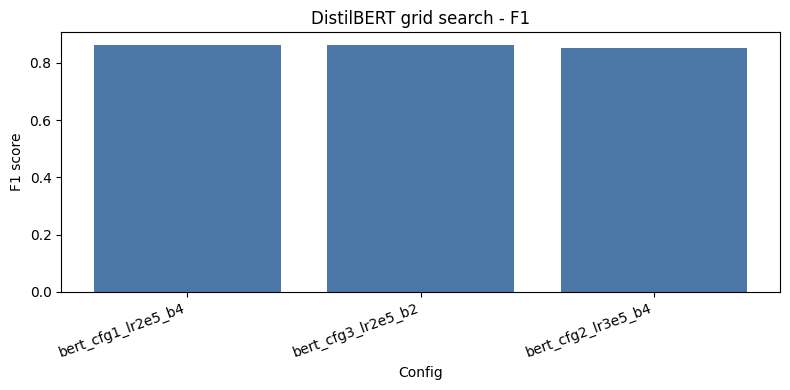

In [28]:
# --- prezentare rezultate: tabel + grafic ---
import matplotlib.pyplot as plt

# tabel (deja avem bert_results_df)
bert_results_df

# grafic F1 pentru fiecare config
plt.figure(figsize=(8, 4))
plt.bar(bert_results_df["config"], bert_results_df["f1_score"], color="#4C78A8")
plt.ylabel("F1 score")
plt.xlabel("Config")
plt.title("DistilBERT grid search - F1")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.savefig("../results/metrics_distilbert_grid.png", dpi=150)
plt.show()


### Celula 29
**Ce face:** Încarcă datele din fișiere CSV.


,model,config,accuracy,precision,recall,f1_score
3,DistilBERT,bert_cfg1_lr2e5_b4,0.86512,0.871480,0.85656,0.863955
4,DistilBERT,bert_cfg3_lr2e5_b2,0.86436,0.871887,0.85424,0.862973
5,DistilBERT,bert_cfg2_lr3e5_b4,0.85664,0.879469,0.82656,0.852194
0,SVM+TFIDF+extra_feats,svm_cfg2_uni+bi_C2,0.60500,0.558859,0.99696,0.716227
1,SVM+TFIDF+extra_feats,svm_cfg3_uni+bi_C0.5,0.59324,0.551559,0.99744,0.710326
2,SVM+TFIDF+extra_feats,svm_cfg1_unigram_C1,0.70788,0.953411,0.43712,0.599419


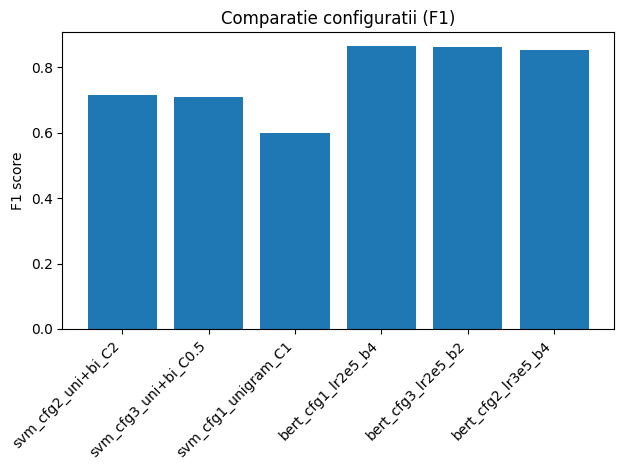

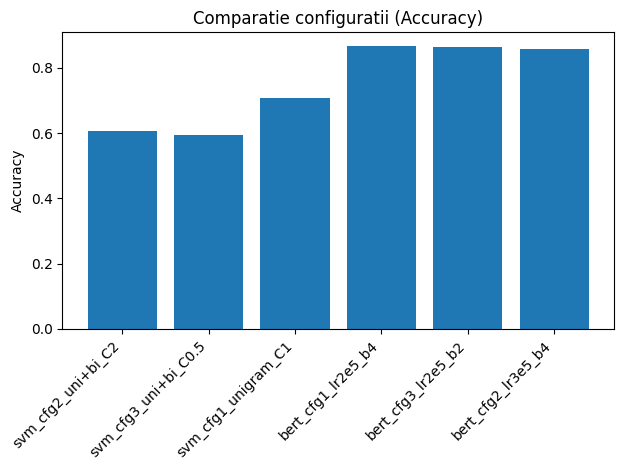

In [29]:
import matplotlib.pyplot as plt

svm_df  = pd.read_csv("../results/metrics_svm_grid.csv")
bert_df = pd.read_csv("../results/metrics_distilbert_grid.csv")

all_df = pd.concat([
    svm_df[["model","config","accuracy","precision","recall","f1_score"]],
    bert_df[["model","config","accuracy","precision","recall","f1_score"]],
], ignore_index=True)

all_df.to_csv("../results/metrics_all_models.csv", index=False)
display(all_df.sort_values("f1_score", ascending=False))

# grafic F1
plt.figure()
plt.bar(all_df["config"], all_df["f1_score"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("F1 score")
plt.title("Comparatie configuratii (F1)")
plt.tight_layout()
plt.show()

# grafic Accuracy
plt.figure()
plt.bar(all_df["config"], all_df["accuracy"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.title("Comparatie configuratii (Accuracy)")
plt.tight_layout()
plt.show()

### Celula 30
**Ce face:** Evaluează modelul / produce predicții.


/Users/raressimon/Desktop/ProiectFinalNLP/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  super().__init__(loader)


              precision    recall  f1-score   support

    negative     0.8832    0.9026    0.8928     12500
    positive     0.9004    0.8806    0.8904     12500

    accuracy                         0.8916     25000
   macro avg     0.8918    0.8916    0.8916     25000
weighted avg     0.8918    0.8916    0.8916     25000



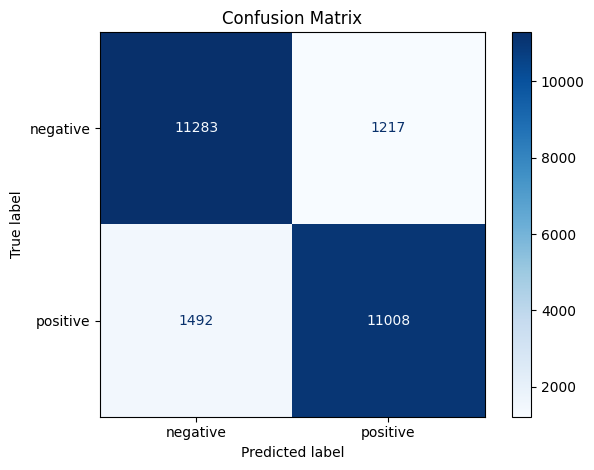

PR-AUC: 0.956685636386713


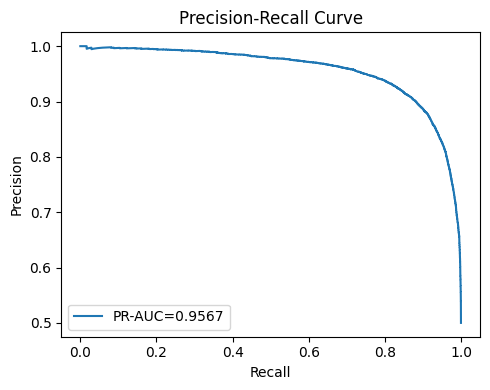

In [ ]:

import numpy as np
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    auc,
)
import matplotlib.pyplot as plt

pred = trainer.predict(test_tok)
logits = pred.predictions
labels = pred.label_ids

probs = np.exp(logits) / np.exp(logits).sum(axis=-1, keepdims=True)
positive_probs = probs[:, 1]
preds = np.argmax(logits, axis=-1)

# Macro-F1, precision/recall, accuracy etc.
print(classification_report(labels, preds, target_names=["negative", "positive"], digits=4))

# Confusion Matrix (obligatoriu)
cm = confusion_matrix(labels, preds)
ConfusionMatrixDisplay(cm, display_labels=["negative", "positive"]).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig("../results/confusion_matrix_distilbert.png", dpi=150)
plt.show()

# PR-AUC
prec, rec, _ = precision_recall_curve(labels, positive_probs)
pr_auc = auc(rec, prec)
print("PR-AUC:", pr_auc)

plt.figure(figsize=(5,4))
plt.plot(rec, prec, label=f"PR-AUC={pr_auc:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.tight_layout()
plt.savefig("../results/pr_curve_distilbert.png", dpi=150)
plt.show()


### Celula 31
**Ce face:** Pornește cronometrul pentru durata totală a notebook‑ului.


In [31]:
# --- end timer ---
import time
if 'PROCESS_START' in globals():
    elapsed = time.time() - PROCESS_START
    print(f"Total elapsed: {elapsed/60:.2f} min ({elapsed:.0f} sec)")
else:
    print("PROCESS_START not set. Run the start timer cell at the top.")


Total elapsed: 248.82 min (14929 sec)


### Celula 32
**Ce face:** Salvează modelul și tokenizerul.


In [ ]:
# --- save final model ---
save_dir = "../results/distilbert_final_model"
trainer.save_model(save_dir)
tokenizer.save_pretrained(save_dir)
print(f"Saved model to {save_dir}")


Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Saved model to ../results/distilbert_final_model


### Celula 33
**Ce face:** Initializează tokenizerul pentru modelul neural.


In [33]:
# --- quick manual test ---
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

save_dir = "../results/distilbert_final_model"
model = AutoModelForSequenceClassification.from_pretrained(save_dir)
tokenizer = AutoTokenizer.from_pretrained(save_dir)
model.eval()

text = "Great, another masterpiece of mediocrity… I almost stayed awake."  # schimbă cu propoziția ta
inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128)

with torch.no_grad():
    outputs = model(**inputs)
    probs = torch.softmax(outputs.logits, dim=-1).squeeze(0)

labels = {0: "negative", 1: "positive"}
pred_id = int(torch.argmax(probs).item())
print("Text:", text)
print("Predicție:", labels[pred_id])
print("Probabilități:", {labels[0]: float(probs[0]), labels[1]: float(probs[1])})


Loading weights:   0%|          | 0/104 [00:00<?, ?it/s]

Text: Great, another masterpiece of mediocrity… I almost stayed awake.
Predicție: positive
Probabilități: {'negative': 0.1260964572429657, 'positive': 0.8739035725593567}


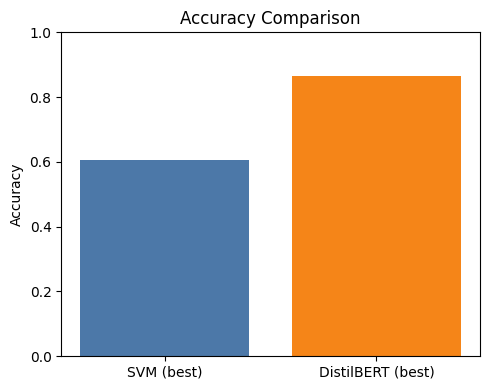

In [ ]:
# --- accuracy comparison (SVM vs DistilBERT) ---
import pandas as pd
import matplotlib.pyplot as plt

# load metrics
svm_df = pd.read_csv("../results/metrics_svm_grid.csv")
bert_df = pd.read_csv("../results/metrics_distilbert_grid.csv")

# pick best by f1
svm_best = svm_df.sort_values("f1_score", ascending=False).iloc[0]
bert_best = bert_df.sort_values("f1_score", ascending=False).iloc[0]

labels = ["SVM (best)", "DistilBERT (best)"]
accs = [svm_best["accuracy"], bert_best["accuracy"]]

plt.figure(figsize=(5,4))
plt.bar(labels, accs, color=["#4C78A8", "#F58518"])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.tight_layout()
plt.savefig("../results/accuracy_comparison.png", dpi=150)
plt.show()


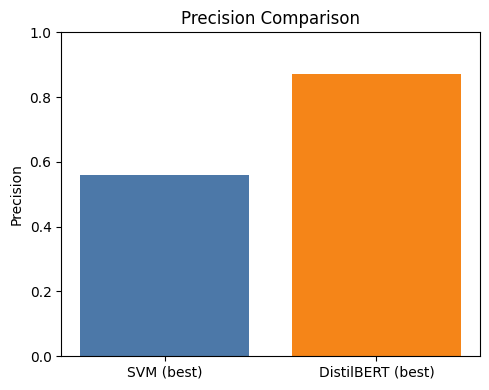

In [35]:
# --- precision comparison (SVM vs DistilBERT) ---
import pandas as pd
import matplotlib.pyplot as plt

svm_df = pd.read_csv("../results/metrics_svm_grid.csv")
bert_df = pd.read_csv("../results/metrics_distilbert_grid.csv")

svm_best = svm_df.sort_values("f1_score", ascending=False).iloc[0]
bert_best = bert_df.sort_values("f1_score", ascending=False).iloc[0]

labels = ["SVM (best)", "DistilBERT (best)"]
vals = [svm_best["precision"], bert_best["precision"]]

plt.figure(figsize=(5,4))
plt.bar(labels, vals, color=["#4C78A8", "#F58518"])
plt.ylim(0, 1)
plt.ylabel("Precision")
plt.title("Precision Comparison")
plt.tight_layout()
plt.savefig("../results/precision_comparison.png", dpi=150)
plt.show()


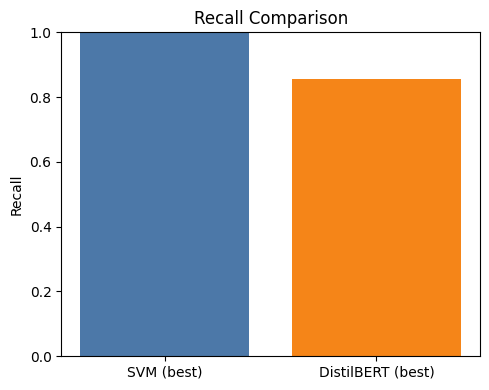

In [36]:
# --- recall comparison (SVM vs DistilBERT) ---
import pandas as pd
import matplotlib.pyplot as plt

svm_df = pd.read_csv("../results/metrics_svm_grid.csv")
bert_df = pd.read_csv("../results/metrics_distilbert_grid.csv")

svm_best = svm_df.sort_values("f1_score", ascending=False).iloc[0]
bert_best = bert_df.sort_values("f1_score", ascending=False).iloc[0]

labels = ["SVM (best)", "DistilBERT (best)"]
vals = [svm_best["recall"], bert_best["recall"]]

plt.figure(figsize=(5,4))
plt.bar(labels, vals, color=["#4C78A8", "#F58518"])
plt.ylim(0, 1)
plt.ylabel("Recall")
plt.title("Recall Comparison")
plt.tight_layout()
plt.savefig("../results/recall_comparison.png", dpi=150)
plt.show()


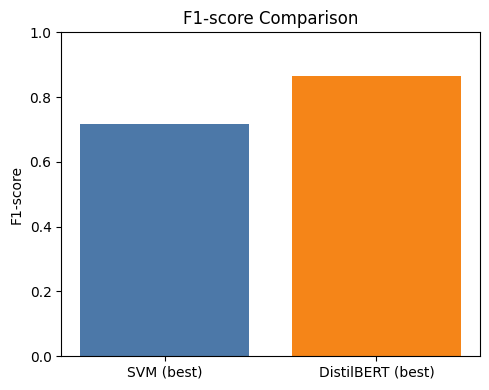

In [37]:
# --- f1-score comparison (SVM vs DistilBERT) ---
import pandas as pd
import matplotlib.pyplot as plt

svm_df = pd.read_csv("../results/metrics_svm_grid.csv")
bert_df = pd.read_csv("../results/metrics_distilbert_grid.csv")

svm_best = svm_df.sort_values("f1_score", ascending=False).iloc[0]
bert_best = bert_df.sort_values("f1_score", ascending=False).iloc[0]

labels = ["SVM (best)", "DistilBERT (best)"]
vals = [svm_best["f1_score"], bert_best["f1_score"]]

plt.figure(figsize=(5,4))
plt.bar(labels, vals, color=["#4C78A8", "#F58518"])
plt.ylim(0, 1)
plt.ylabel("F1-score")
plt.title("F1-score Comparison")
plt.tight_layout()
plt.savefig("../results/f1_comparison.png", dpi=150)
plt.show()
